# Heather's Capstone Notebook

In [1]:
import pandas as pd
import numpy as np

import new_wrangle as w
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# acquire dataset

df = w.wrangle_walmart()

/Users/Heather/codeup-data-science/capstone/new_wrangle.py:65: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_week'] = pd.DatetimeIndex(df['Date']).week


In [3]:
df.head()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_week,deflated_series,sales_delta,gas_delta,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42,2.57,211.096,8.106,A,151315,February,2010,1,Friday,5,7786.46,0.0,0.0,Winter,no_holiday
2010-02-05,10,2193048.75,0,54,2.96,126.442,9.765,B,126512,February,2010,1,Friday,5,17344.31,0.0,0.0,Winter,no_holiday
2010-02-05,37,536006.73,0,45,2.57,209.853,8.554,C,39910,February,2010,1,Friday,5,2554.20,0.0,0.0,Winter,no_holiday
2010-02-05,17,789036.02,0,23,2.67,126.442,6.548,B,93188,February,2010,1,Friday,5,6240.30,0.0,0.0,Winter,no_holiday
2010-02-05,30,465108.52,0,39,2.57,210.753,8.324,C,42988,February,2010,1,Friday,5,2206.89,0.0,0.0,Winter,no_holiday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         6435 non-null   int64  
 1   weekly_sales     6435 non-null   float64
 2   holiday_flag     6435 non-null   int64  
 3   temperature      6435 non-null   int64  
 4   fuel_price       6435 non-null   float64
 5   CPI              6435 non-null   float64
 6   unemployment     6435 non-null   float64
 7   store_type       6435 non-null   object 
 8   store_size       6435 non-null   int64  
 9   month            6435 non-null   object 
 10  year             6435 non-null   int64  
 11  quarter          6435 non-null   int64  
 12  weekday          6435 non-null   object 
 13  week_of_week     6435 non-null   int64  
 14  deflated_series  6435 non-null   float64
 15  sales_delta      6435 non-null   float64
 16  gas_delta        6435 non-null   float64
 

## Add Holiday's to column

Goal: Create variable called `holiday_week` with the name of the holiday. Later will break out into `is_superbowl`, `is_laborday`, `is_christmas` etc. no holiday

### Holiday List

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [5]:
# get value counts of weeks with holidays and weeks without
df.holiday_flag.value_counts()

0    5985
1     450
Name: holiday_flag, dtype: int64

There's already a column called holiday flag. 0 no holiday 1 holiday. Since we already have this information, we need to know which of these weeks belong to what projects. 

In [6]:
# OOOHHH Those weeks are already there. So Need to filter for those 

christmases = ['2010-12-31', '2011-12-30', '2012-12-28']

super_bowls = ['2010-02-12', '2011-02-11', '2012-02-10']

labor_days = ['2010-09-10', '2011-09-09', '2012-09-07']

thanksgivings = ['2010-11-26', '2011-11-25', '2012-11-23']


In [25]:
# Create loopy deal

def add_which_holiday(df):
    '''
    This function takes in the walmart dataframe
    Has list of different dates for holidays in the function
    Adds a column called 'holiday_name' with the name of the holiday if that week corresponds
    with the date
    any that don't have a holiday get filled with the value no_holiday
    
    '''
    # create lists of holidays 
    christmases = ['2010-12-31', '2011-12-30', '2012-12-28']

    super_bowls = ['2010-02-12', '2011-02-11', '2012-02-10']

    labor_days = ['2010-09-10', '2011-09-09', '2012-09-07']

    thanksgivings = ['2010-11-26', '2011-11-25', '2012-11-23']
    
    # turn christmas list into datetimes 
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in christmases]
    # add column called holiday_name christmas where dates match list
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'christmas'
    
    # turn super bowl list into date times
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]  
    #add super bowl where dates match list
    df.loc[df.index.isin(dates_list) == True,'holiday_name'] = 'super_bowl'
    
    # labor day list into date times
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in labor_days] 
    # add super bowl where dates match list
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'labor_day'
    
    # thanksgiving list into date times
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in thanksgivings] 
    # add super bowl where dates match list
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'thanksgiving'
    
    df = df.fillna('no_holiday')
    
    return df


In [8]:
# christmas
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in christmases]
    
df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'christmas'

#super bowl
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]  
df.loc[df.index.isin(dates_list) == True,'holiday_name'] = 'super_bowl'

# labor day
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in labor_days]  
df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'labor_day'

# thanksgiving
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in thanksgivings]  
df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'thanksgiving'

In [9]:
df.groupby(['holiday_name', 'holiday_flag']).count().store_id

holiday_name  holiday_flag
christmas     1                 90
labor_day     1                135
no_holiday    0               5985
super_bowl    1                135
thanksgiving  1                 90
Name: store_id, dtype: int64

In [22]:
df.holiday_name.value_counts()

labor_day       135
super_bowl      135
thanksgiving     90
christmas        90
Name: holiday_name, dtype: int64

In [10]:
sb_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]

df.loc[df.index.isin(sb_list)]

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_week,deflated_series,sales_delta,gas_delta,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,
2010-02-12,8,994801.40,1,33,2.55,214.621,6.299,A,155078,February,2010,1,Friday,6,4635.15,-9335.69,-0.02,Winter,super_bowl
2010-02-12,15,682447.10,1,22,2.94,131.587,8.350,B,123737,February,2010,1,Friday,6,5186.28,30324.66,-0.01,Winter,super_bowl
2010-02-12,43,682918.99,1,47,2.55,203.201,9.521,C,41062,February,2010,1,Friday,6,3360.81,35889.71,-0.02,Winter,super_bowl
2010-02-12,5,311825.70,1,39,2.55,211.800,6.566,B,34875,February,2010,1,Friday,6,1472.26,-5347.40,-0.02,Winter,super_bowl
2010-02-12,39,1266229.07,1,44,2.55,209.997,8.554,A,184109,February,2010,1,Friday,6,6029.75,35632.27,-0.02,Winter,super_bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-10,8,1021400.42,1,35,3.41,223.802,5.825,A,155078,February,2012,1,Friday,6,4563.86,93789.73,0.05,Winter,super_bowl
2012-02-10,44,325377.97,1,33,3.12,130.385,5.774,C,39910,February,2012,1,Friday,6,2495.52,-608.08,0.04,Winter,super_bowl
2012-02-10,3,473292.47,1,51,3.41,223.754,6.833,B,37392,February,2012,1,Friday,6,2115.24,48331.81,0.05,Winter,super_bowl


In [ ]:
def make_holiday_names(df):
    
    # christmas
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in christmases]
        
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'christmas'
    
    #super bowl
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]  
    df.loc[df.index.isin(dates_list) == True,'holiday_name'] = 'super_bowl'
    
    # labor day
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in labor_days]  
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'labor_day'
    
    # thanksgiving
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in thanksgivings]  
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'thanksgiving'

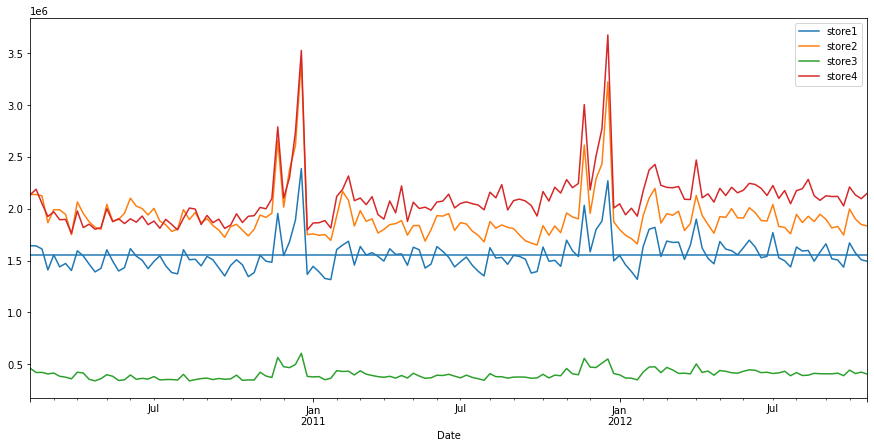

In [17]:
plt.figure(figsize = (15,7))
df[df.store_id == 1]['weekly_sales'].plot()
df[df.store_id == 2]['weekly_sales'].plot()
df[df.store_id == 3]['weekly_sales'].plot()
df[df.store_id == 4]['weekly_sales'].plot()
plt.axhline(df[df.store_id == 1]['weekly_sales'].mean())
plt.legend(['store1' , 'store2', 'store3', 'store4'])
plt.show()